## Goals for the Lecture

The learning goal for this lesson is to provide some background on Machine Learning that we'll use in Sessions 23-26, and to (start to) answer the following questions:

- What is Machine Learning? How is different from statistics?
- Where did the field come from? Where is it going?
- When do we use Machine Learning and what are its limitations?

In [1]:
from IPython.display import YouTubeVideo
import matplotlib.pyplot as plt
import numpy as np

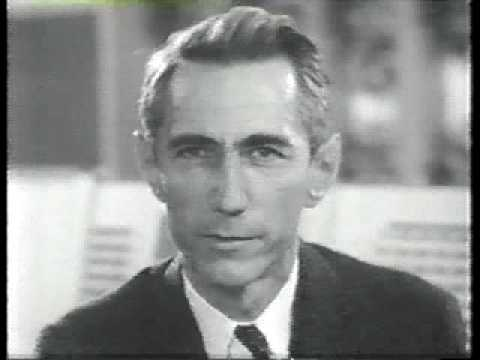

In [2]:
YouTubeVideo('aygSMgK3BEM', width=1200, height=900)

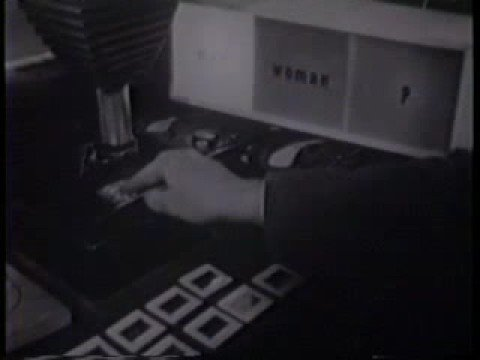

In [3]:
YouTubeVideo('cNxadbrN_aI', width=1200, height=900)

When do we need machine learning?

First, when a task is to complex to perform. That is, where it is
- hard to specify an algorithm for solving the problem
- the data is very large or complex

Second, tasks that require adaptivity
- where a task must change as a result of interaction with the environment

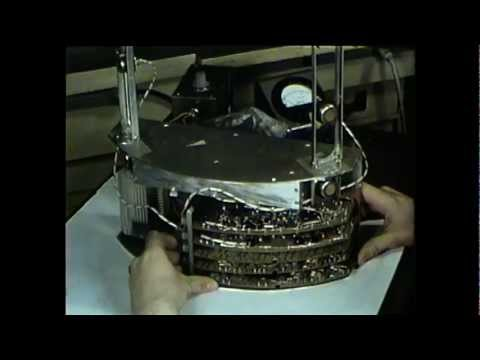

In [4]:
YouTubeVideo('zMpEeag7kkM', width=1200, height=900)

## The (Formal) Structure of the Learning Problem

A Learning Problem consists of the following parts

$\mathit{X}$ - a domain set or instance space of examples. These are usually n-dimensional vectors. We call the components of these vectors, $\textit{features}$.

$\mathit{Y}$ - the label set, in supervised learning problems these are the set of possible $\textit{labels}$ for each element in $\mathit{X}$.

$\mathit{S}$ - the training set. These are ordered pairs of elements from $\mathit{X}$ and $\mathit{Y}$.

For many problems, we additionally assume there is some true mapping $f: \mathit{X} \rightarrow \mathit{Y}$. These problems are called $\textit{supervised learning}$. If no true mapping exists, this is called an $\textit{unsupervised learning}$ problem.

Using the [ten hundred most common words](https://xkcd.com/simplewriter/) in the English language$^\dagger$, I would describe unsupervised learning as

> learning information without class names

or

> finding hidden breaks between groups

$^\dagger$ See [Up-goer five](https://xkcd.com/1133/).

If we expand our volabulary slightly, then unsupervised learning could be described as

> the search for underlying structure within the data

or

> learning from data without rewards (reinforcement learning) or labels (supervised learning)

What follows is a broad overview of several of the common techniques that constitute unsupervised learning.

We start with a familiar example.

Suppose Nature produces some family of sources that tend to be either big or small. Mathematically we might represent the distribution of these sources as

$$P \propto 0.35\mathcal{N}(30, 5^2) + 0.65\mathcal{N}(60,8^2)$$

where $\mathcal{N}$ represents the normal distribution.

Using [`np.random`](https://numpy.org/doc/stable/reference/random/index.html) we can generate samples from this distribution:

In [5]:
def generate_samples(n_sources):
    rand_dist = np.random.rand(n_sources)
    size = np.empty_like(rand_dist)
    small = rand_dist <= 0.35
    size[small] = np.random.normal(30, 5, size=sum(small))
    size[~small] = np.random.normal(60,8,  size=sum(~small))
    return size

In practice, we observe nature and do not know the true probability density function (PDF) for the sources of interest.

The subject of density estimation (of this PDF) will be a topic that we explore, from a statistical perspective, thoroughly this week.

# Clustering

Closely related to density estimation is clustering.

## K-means Clustering

Every discussion of clustering starts with K-means, which is a simple method to identify clusters within a dataset.

In brief, the user specifies the number of clusters to search for $K$, and the algorithm proceeds to divide sources in the feature space accordingly.

The pseudocode is:  

  1. choose the number of clusters, K
  2. choose K random sources for initial cluster centers
  3. assign each source to the nearest cluster (min distance between cluster center and source)
  4. update the position of the cluster center to be the mean position of all in-cluster sources
  5. repeat steps 3 and 4

Once a user-specified stopping criteria is reached, such as $N$ cluster updates or some small fractional change in the cluster centers, further updates do not occur.

We can visually demonstrate how this works.

*A Note: lowercase = label, and capital letter is feature*

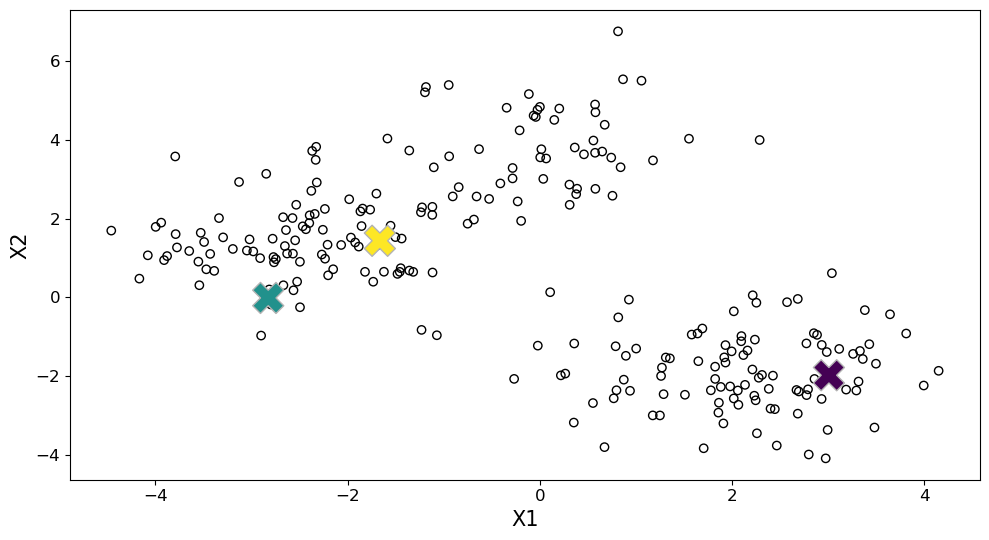

In [6]:
from sklearn.datasets import make_blobs

X, y = make_blobs([50,100,100], n_features=2, cluster_std=1, center_box=(-4,4), random_state=23)

def kmeans_init(ax, fs=15):
    ax.scatter(X[:,0], X[:,1], facecolor="None", edgecolors='k')
    ax.scatter(X[0:3,0], X[0:3,1],
           marker='X', s=500, c=[0,1,2], edgecolors='0.7')
    ax.set_xlabel('X1', fontsize=fs)
    ax.set_ylabel('X2', fontsize=fs)
    ax.tick_params(axis='both', labelsize=12)

fig, ax = plt.subplots(figsize=(10,5.5))
kmeans_init(ax)
fig.tight_layout()

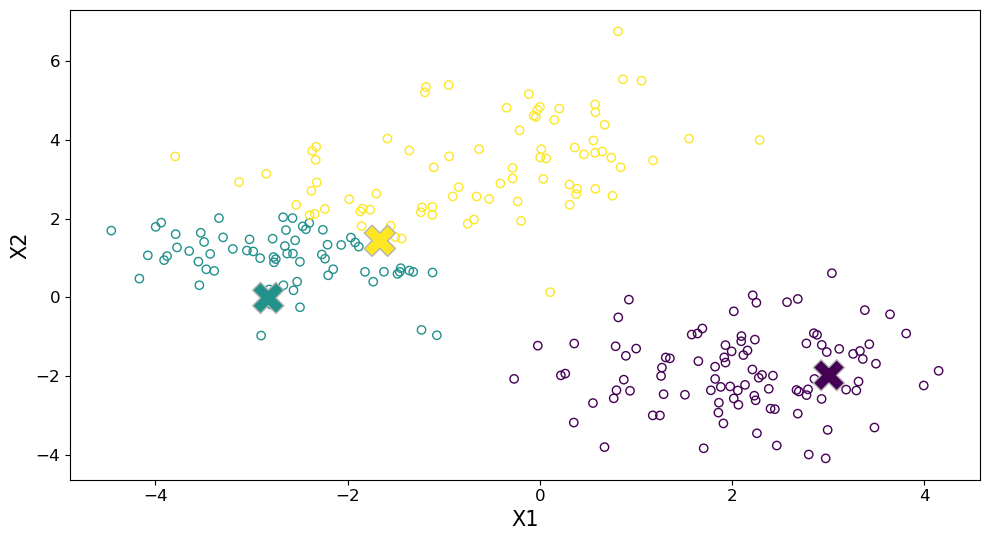

In [7]:
from sklearn.cluster import KMeans

def kmeans_assign(ax, X=X, fs=15):
    clf = KMeans(n_clusters=3, init = X[0:3], max_iter=1, n_init=1)
    clf.fit(X)

    cmap = plt.get_cmap("viridis")
    colors = cmap(clf.labels_/2)

    ax.scatter(X[:,0], X[:,1], facecolor="None", edgecolors=colors)
    ax.scatter(X[0:3,0], X[0:3,1],
           marker='X', s=500, c=[0,1,2], edgecolors='0.7')
    ax.set_xlabel('X1', fontsize=fs)
    ax.set_ylabel('X2', fontsize=fs)
    ax.tick_params(axis='both', labelsize=12)

fig, ax = plt.subplots(figsize=(10,5.5))
kmeans_assign(ax)
fig.tight_layout()

### Write an iterative plotting showing how the cluster centers update. 
### Do this for one iteration, and then for the tenth iteration. 

In [24]:
clf = KMeans(n_clusters=3, init = X[0:3], max_iter=1, n_init=1)
clf.fit(X) 

cmap = plt.get_cmap("viridis")
colors = cmap(clf.labels_/2)

center1 = clf.cluster_centers_

def kmeans1(ax, X=X, fs=15):
    ax.scatter(X[:,0], X[:,1], facecolor="None", edgecolors=colors)
    ax.scatter(X[0:3,0], X[0:3,1],
           marker='X', s=500, c=[0,1,2], edgecolors='0.7')

    ax.set_xlabel('X1', fontsize=fs)
    ax.set_ylabel('X2', fontsize=fs)
    ax.tick_params(axis='both', labelsize=12)

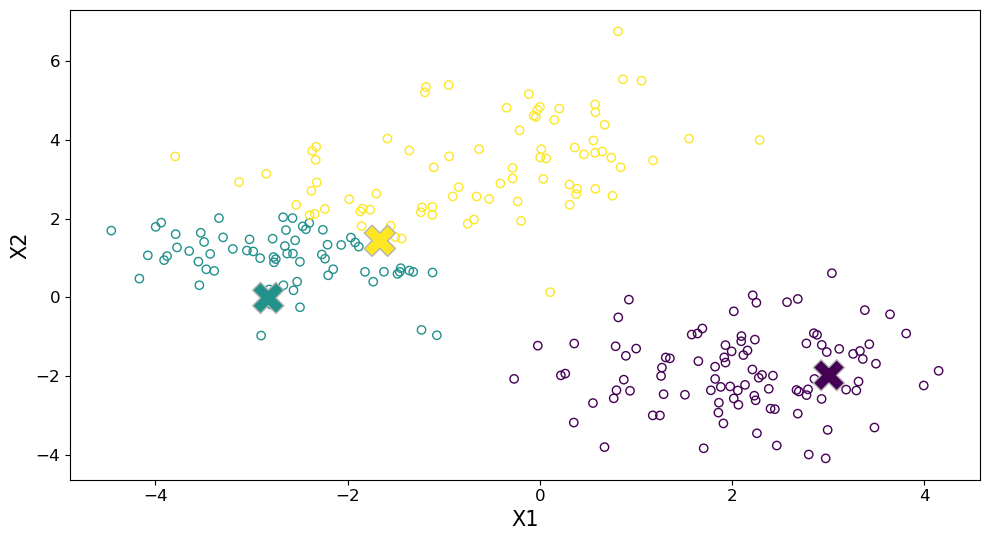

In [20]:
fig, ax = plt.subplots(figsize=(10,5.5))
kmeans1(ax)
fig.tight_layout()

In [ ]:
center = []
center.append(X[0:3])

for n in range(0:10):



def kmeans1(ax, X=X, fs=15):

    alphas = 0.1 * np.ones(9);
    alphas = np.hstack((alphas,1))

    # fill in 
        
    return alphas

fig, ax = plt.subplots(figsize=(10,5.5))
# fill in 
fig.tight_layout()

For this (extremely) simple example we can see that the clusters have converged.

Under the hood, there are some user-defined parameters (e.g., distance metric – we used Euclidean), but one choice stands above all else...

How in the world do we choose $K$?

For the previous example, we created the data and therefore knew $K = 3$ was reasonable. When clustering new data, however, $K$ is truly unknown. By definition the algorithm will always find $K$ clusters, whether or not there are $K$ clusters present.

Many clustering methods require the user to specify the number of clusters, prior to the application of the algorithm. There is also no natural metric for calculating if the specified number of clusters is correct.

# let's tackle a slightly more complicated problem: k-nn classification

In [21]:
import pandas as pd

In [23]:
data = pd.read_csv('star_classification.csv', sep = ',')

df = data.sample(frac = 0.2, random_state = 11)

df.reset_index(drop = True, inplace=True)

Let's learn a few things about this data frame.

In [25]:
# look at the columns 
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

We can get some basic info about the data (numerical columns only!) like this.

In [29]:
# use a pandas method to look at the statistics describing this dataset
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.0,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000
mean,1.237665e+18,177.842440,24.090014,21.570237,20.112328,19.631559,19.072001,18.258834,4484.174000,301.0,3.504450,185.671850,5.744512e+18,0.569276,5102.041700,55570.825150,449.194850
std,8.494500e+12,96.449277,19.671442,70.895801,70.878771,1.865094,1.767396,70.858525,1977.787496,0.0,1.584268,148.777943,3.307683e+18,0.717889,2937.795949,1801.149748,272.016573
min,1.237646e+18,0.011684,-18.785328,-9999.000000,-9999.000000,10.068540,10.566470,-9999.000000,109.000000,301.0,1.000000,11.000000,2.996213e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,128.062911,4.792074,20.326388,18.948163,18.114108,17.688330,17.426372,3185.000000,301.0,2.000000,81.000000,2.840735e+18,0.052374,2523.000000,54232.750000,222.000000
50%,1.237663e+18,181.844138,23.669408,22.181680,21.103180,20.116750,19.390850,18.990105,4188.000000,301.0,4.000000,146.000000,5.507912e+18,0.420752,4892.000000,55858.000000,433.000000
75%,1.237668e+18,234.300980,39.764756,23.699415,22.111157,21.026725,20.370548,19.914907,5327.000000,301.0,5.000000,239.000000,8.251792e+18,0.696156,7329.000000,56749.000000,641.000000
max,1.237681e+18,359.978910,79.289299,32.781390,28.903200,29.571860,30.154600,29.383740,8162.000000,301.0,6.000000,989.000000,1.412685e+19,7.011245,12547.000000,58932.000000,1000.000000


What should be our features and targets?

In [48]:
features = ['u', 'g', 'r', 'i', 'z']
targets = ['obj_ID']


We can select the following columns:

In [49]:
# select the features 

seldf = df[features]
seldf

,u,g,r,i,z
0,22.56366,22.30574,20.71001,19.60254,19.29095
1,21.61265,21.52663,21.06938,21.09617,20.68413
2,21.77360,20.60026,20.68102,20.81975,20.79408
3,19.17278,17.70152,16.99073,16.57557,16.32981
4,26.46931,20.59701,18.95319,18.31693,17.91509
...,...,...,...,...,...
19995,23.93962,21.90381,20.23260,19.26725,18.71285
19996,18.08581,17.40046,17.18425,17.01572,16.92474
19997,20.89581,20.22679,19.25845,18.84204,18.48117
19998,19.30556,18.39668,18.11955,17.99653,17.97352


### Feature exploration.

What should we do?

np.float64(22.56366)

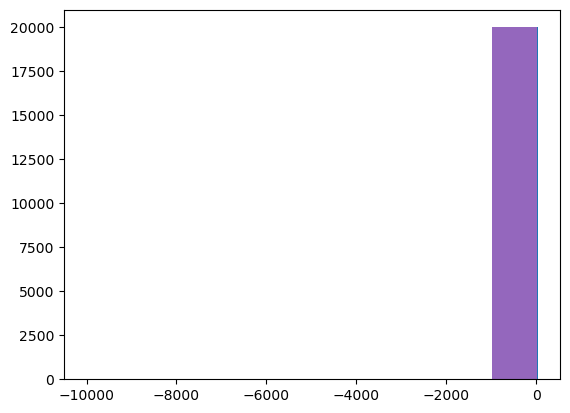

In [47]:
# make a histogram of the selected features
for col in seldf.columns:
    plt.hist(seldf[col], bins=10)

When a histogram looks like this, what does it mean?

In [ ]:
# fix the issue(s) with the previous histogram 

for col in :
    plt.hist()

In [ ]:
# what issue did you identify and where do you think 
# this issue comes from in terms of how photometry is done? 
# print out the number of problematic measurments for each feature

for col in:
    print()

One possible (less than ideal) selection:

In [ ]:
for col in :
    seldf = # fill in  >= 0

In [ ]:
seldf.shape

In [ ]:
for col in :
    plt.hist()

Let's now turn to the target column.

In [ ]:
# print out the target categories 

In [ ]:
# use the sklearn LabelEncoder to make labels for these categories 

from sklearn.preprocessing import LabelEncoder

le = #fill in, turns categorical into 1 ... N

In [ ]:
# apply the labels 

y = # fill in 

In [ ]:
# print out the classes 

It is also useful to know which class was mapped to which number!

In [ ]:
# dictionary 

le_name_mapping = # print the mapping as a dictionary
print(le_name_mapping)

We can now plot the class distribution to see if something stands out.

In [ ]:
# make a histogram

Verdict: Is there anything we should keep in mind?

In [ ]:
target = y[seldf.index]

Now that we have our feature matrix and target vector, we could try and build a model, or try to get some more intel on the relationship between features and target. One way is to build a correlation matrix (easiest with seaborn); another one that I like when there are very few features like in this case, is to make scatter plots of the features and color the points by the label, to see if any obvious gradient shows up.

In [ ]:
len(seldf.columns)

In [ ]:
#It will take a little time.

fig, axes = plt.subplots(ncols = len(seldf.columns), nrows = len(seldf.columns), figsize=(50,50))

for i, col in enumerate(seldf.columns):
    for j, col2 in enumerate(seldf.columns):
        axes[i,j].scatter(seldf[col], seldf[col2], c = target)
        axes[i,j].set_xlabel(str(seldf[col].name), fontsize = 35)
        axes[i,j].set_ylabel(str(seldf[col2].name), fontsize = 35)

Q: Is there anything special that we can learn from these plots? Do we expect our features to have enough discriminating power? Why or why not?








### Building models

Alright, time to build our first model - let's start with kNN.

This line helps visualize the parameters of any algorithm.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# fill in, define the model and print out the parameters of the model

We can set up a cross validation strategy like this.

In [ ]:
# now perform cross validation 

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

cv = KFold(n_splits=5, random_state=10, shuffle= True)

This line does the cross validation for us by randomizing the data, creating five folds, building 5 models with the 5 possible training sets, applying each model to the objects in the test fold, and saving the 5 train and test scores in a dictionary.

In [ ]:
scores = cross_validate(model, seldf, target, cv = cv, return_train_score = True)
print(scores)

In [ ]:
print("Time: %.3fs, Mean train score: %.3f, Mean test score: %.3f, std: %.3f"%(scores['score_time'].mean(), scores['train_score'].mean(), scores['test_score'].mean(), scores['test_score'].std()))